3.33-3.36, 5.7-5.8.

# 3.33 Underwriter. Minimum of net. Capital requirement.

In [3]:
portFolioRisk = function(mk, lambda, xsi, sigma){
    X = 1:mk*0
    N = rpois(mk, lambda)
    for (i in 1:mk){
        Z = rlnorm(N[i], xsi, sigma) 
        X[i] = sum(Z)
    }
    return(X)
}

underwriter = function(lambda, xsi, sigma, pi, nu0, K, m){
    mk = m*K
    X = portFolioRisk(mk, lambda, xsi, sigma)
    X = matrix(X, K, m)
    Y = nu0 - apply(X - pi, 2, cumsum) # K x m matrix. Each period in K has a MC value in m.
    # apply: (X-pi) is function or matrix. 2 is which dimension. cumsum is what to do. 
    # apply: https://www.datacamp.com/community/tutorials/r-tutorial-apply-family
    Y = rbind(rep(nu0, m), Y) # Still K x m. rep(nu0,m): m-vector with nu0 every element. 
    #Y now starts with nu0 each MC I think.
    # Rbind: To join two data frames (datasets) vertically, use the rbind function.
    return(Y)    
}



lambda = 10
xsi = 0
sigma = 1
pis = c(18, 16.4)
pi = 18
nu0 = 0
Ks = c(20, 10, 5)
m = 10000
epsilon = c(.05, .01)

counter = 1
par(mfrow = c(1, length(pis)))
for (K in Ks){
    Y = underwriter(lambda, xsi, sigma, pi, nu0, K, m)
    Ymin = apply(Y, 2, min)
    v0Epsilon = -sort(Ymin)[epsilon*m]
    print(v0Epsilon)
    #matplot(0:K, Y, "l", ylim=c(-100, 200))
    #title(c('pi ', pi))
    counter = counter + 1
}

[1] 51.1451 80.9186
[1] 41.11800 65.01962
[1] 30.44243 47.36677


More periods, less minima.

# 3.34 Underwriter. Financial income constant return.


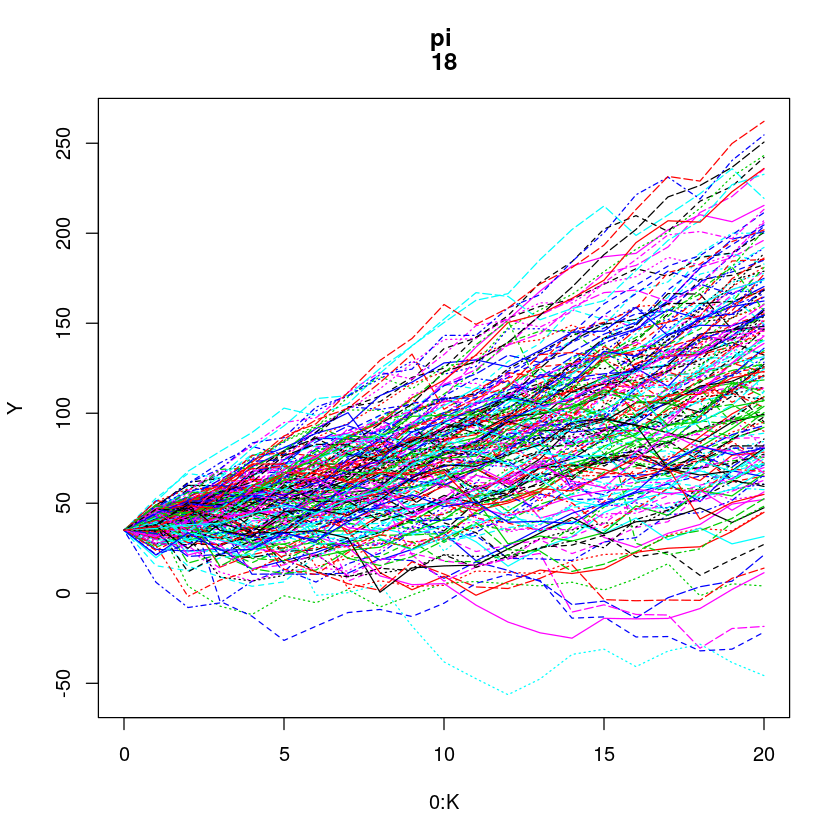

In [10]:
portFolioRisk = function(mk, lambda, xsi, sigma){
    X = 1:mk*0
    N = rpois(mk, lambda)
    for (i in 1:mk){
        Z = rlnorm(N[i], xsi, sigma) 
        X[i] = sum(Z)
    }
    return(X)
}

underwriter = function(lambda, xsi, sigma, pi, nu0, K, m, r){
    mk = m*K
    X = portFolioRisk(mk, lambda, xsi, sigma)
    X = matrix(X, K, m)
    rk = (1+r)**(1:K)
    B = (X - pi)/rk
    S = apply(B, 2, cumsum)
    Y = rk*(nu0 - S)
    Y = rbind(rep(nu0, m), Y) # Still K x m. rep(nu0,m): m-vector with nu0 every element. 
    #Y now starts with nu0 each MC I think.
    # Rbind: To join two data frames (datasets) vertically, use the rbind function.
    return(Y)    
}

lambda = 10
xsi = 0
sigma = 1
pi = 18
nu0 = 35
K = 20
m = 200
r = .04


Y = underwriter(lambda, xsi, sigma, pi, nu0, K, m, r)
matplot(0:K, Y, "l")
title(c('pi ', pi))

Larger upward drift compared to 3.30c where there was no financial income.

# 3.35 Underwriter. Financial income constant return. DIfferent parameters

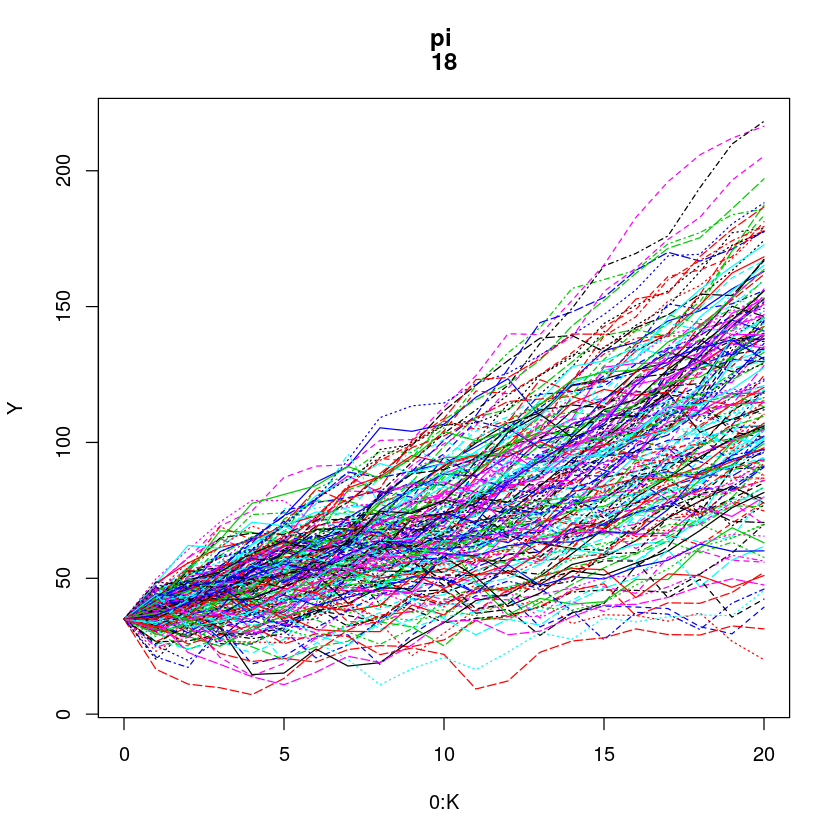

In [15]:
portFolioRisk = function(mk, lambda, xsi, sigma){
    X = 1:mk*0
    N = rpois(mk, lambda)
    for (i in 1:mk){
        Z = rlnorm(N[i], xsi, sigma) 
        X[i] = sum(Z)
    }
    return(X)
}

underwriter = function(lambda, xsi, sigma, pi, nu0, K, m, r){
    mk = m*K
    X = portFolioRisk(mk, lambda, xsi, sigma)
    X = matrix(X, K, m)
    rk = (1+r)**(1:K)
    B = (X - pi)/rk
    S = apply(B, 2, cumsum)
    Y = rk*(nu0 - S)
    Y = rbind(rep(nu0, m), Y) # Still K x m. rep(nu0,m): m-vector with nu0 every element. 
    #Y now starts with nu0 each MC I think.
    # Rbind: To join two data frames (datasets) vertically, use the rbind function.
    return(Y)    
}

lambda = 10
xsi = .455
sigma = .3
pi = 18
nu0 = 35
K = 20
m = 200
r = .04


Y = underwriter(lambda, xsi, sigma, pi, nu0, K, m, r)
matplot(0:K, Y, "l")
title(c('pi ', pi))

As in 3.32, the effect of reducing the variance is less oscillations. <br>
<mark> Unsure effect financial income now compared to above.
    
# 3.36 Underwriter. Financial income. Capital requirement.

In [28]:
portFolioRisk = function(mk, lambda, xsi, sigma){
    X = 1:mk*0
    N = rpois(mk, lambda)
    for (i in 1:mk){
        Z = rlnorm(N[i], xsi, sigma) 
        X[i] = sum(Z)
    }
    return(X)
}

underwriter = function(lambda, xsi, sigma, pi, nu0, K, m, r){
    mk = m*K
    X = portFolioRisk(mk, lambda, xsi, sigma)
    X = matrix(X, K, m)
    rk = (1+r)**(1:K)
    B = (X - pi)/rk
    S = apply(B, 2, cumsum)
    Smax = apply(S, 2, max)
    Y = rk*(nu0 - S)
    Y = rbind(rep(nu0, m), Y) # Still K x m. rep(nu0,m): m-vector with nu0 every element. 
    #Y now starts with nu0 each MC I think.
    # Rbind: To join two data frames (datasets) vertically, use the rbind function.
    return(list(Y, Smax))    
}

lambda = 10
xsi = 0
sigma = 1
pi = 18
nu0 = 35
Ks = c(20, 10, 5)
m = 10000
r = .04
epsilon = c(.05, .01)

for (K in Ks){
    out = underwriter(lambda, xsi, sigma, pi, nu0, K, m, r)
    Y = unlist(out[1])
    Smax = unlist(out[2])
    nu0Out = sort(Smax)[(1-epsilon)*m]
    print(nu0Out)
}

#matplot(0:K, Y, "l")
#title(c('pi ', pi))

[1] 39,41545 61,46343
[1] 34,13748 53,82232
[1] 27,99282 46,22919


The corresponding values in the absence of financial incomce were <br>
1] 51.1451 80.9186 <br>
[1] 41.11800 65.01962 <br>
[1] 30.44243 47.36677 <br>

Financial income reudces capital requriements.<br>

As before, more periods gives lower capital requirements.

# 5.7 Markowitz. Effect of correlation. 

In [50]:
xi = c(.6107, .4670)
r = 0.4361
eg = 3.3869
rhos = c(.9654, .8, .6)

sigma <- c(1.58,1.9)

for (rho in rhos){
    v = c(1.58**2, rho*1.58*1.90, rho*1.58*1.90, 1.90**2)
    Sigma = matrix(v, 2, 2)
    wTilde = solve(Sigma, xi - r)
    gamma = (eg - r)/wTilde%*%(xi - r)
    w = gamma*wTilde
    vol = sqrt(w%*%Sigma%*%w)
    print(c('rho: ', rho))
    print(w)
}


Warning message in gamma * wTilde:
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] "rho: "  "0,9654"
[1]  19,65981 -15,59230


Warning message in gamma * wTilde:
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] "rho: " "0,8"  
[1]  18,96566 -11,67006


Warning message in gamma * wTilde:
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] "rho: " "0,6"  
[1] 18,233140 -7,530945


First corresponds to table. Lower correlation gives lower negative weight on asset 2.

# 5.8 Markowitz. NYC

In [59]:
#x <- matrix(unlist(read.table("http://www.uio.no/studier/emner/matnat/math/STK3505/h16/data/newyork.daily.txt",row.names=NULL,header=TRUE)),ncol=4)
r = .00025
R = exp(x) - 1
xi = apply(R, 2, mean)
Sigma = cov(R)
wTilde = solve(Sigma, xi - r)
print(wTilde)
egTilde = r + wTilde%*%(xi - r)
sigmaTilde = sqrt(wTilde%*%Sigma%*%wTilde)
print(sigmaTilde)

eg = .0005+0:10*.0001
gamma = (eg - r)/(egTilde - r)
vol = gamma*sigmaTilde
print(vol)

[1]  3,8573106 -0,3293207 -1,9545763  0,5037384
          [,1]
[1,] 0,0282842


Warning message in (eg - r)/(egTilde - r):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in gamma * sigmaTilde:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

 [1] 0,008838856 0,012374398 0,015909940 0,019445483 0,022981025 0,026516567
 [7] 0,030052110 0,033587652 0,037123194 0,040658736 0,044194279
